With clean data, we can start to compare our dataframes and visualize how air pollution and asthma intersect based on our dataframes. To get a better sense of how to test our hypothesis, we started by importing our data into this new file and creating some simple **diagnostic plots**.

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import scipy.stats as stats

asthma = pd.read_csv('../group5-project/Datasets/California_Asthma_Data_ADA.csv', header = 4)
aqi2015 = pd.read_csv('../group5-project/Datasets/annual_aqi_by_county_2015.csv')
aqi2016 = pd.read_csv('../group5-project/Datasets/annual_aqi_by_county_2016.csv')

asthmalist = ['County', 'Year', 'Asthma measure', 'Comparison', 'Group',
       'County prevalence', 'County 95% confidence interval',
       'California prevalence', 'California 95% confidence interval']

ca_asthma = asthma[asthmalist]

ca_aqi2015 = aqi2015.loc[aqi2015['State']=='California',:].reset_index(drop=True)
ca_aqi2016 = aqi2016.loc[aqi2016['State']=='California',:].reset_index(drop=True)

ca_aqi = pd.concat([ca_aqi2015, ca_aqi2016], axis = 0)
ca_asthma2015 = ca_asthma.loc[ca_asthma['Year']=='2015 2016',:].reset_index(drop=True)

print(ca_aqi.head())
ca_asthma2015.head()

        State     County  Year  Days with AQI  Good Days  Moderate Days  \
0  California    Alameda  2015            365        214            139   
1  California     Alpine  2015             31          1             14   
2  California     Amador  2015            364        283             73   
3  California      Butte  2015            365        170            182   
4  California  Calaveras  2015            365        245             98   

   Unhealthy for Sensitive Groups Days  Unhealthy Days  Very Unhealthy Days  \
0                                   12               0                    0   
1                                   13               3                    0   
2                                    8               0                    0   
3                                   12               1                    0   
4                                   18               2                    1   

   Hazardous Days  Max AQI  90th Percentile AQI  Median AQI  Days CO  \
0 

,County,Year,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,Alameda,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7 17.9),14.80%,(14.0 15.7)
1,Alpine,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2 21.1),14.80%,(14.0 15.7)
2,Amador,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2 21.1),14.80%,(14.0 15.7)
3,Butte,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.70%,(7.8 21.6),14.80%,(14.0 15.7)
4,Calaveras,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.20%,(7.2 21.1),14.80%,(14.0 15.7)


First, we wanted to find out what the best data to compare would be to most best capture the correlative relationship between asthma prevalance and AQI (or lackthereof).

Our intuition was to use the median AQI compare with counties in CA, because we thought the median AQI would likely be an accurate reflection of the county's overall air quality.

We made **scatterplot** to compare median AQI the number of Good Days in a county to ensure this metric would give an accurate estimate of the overall air quality in a county

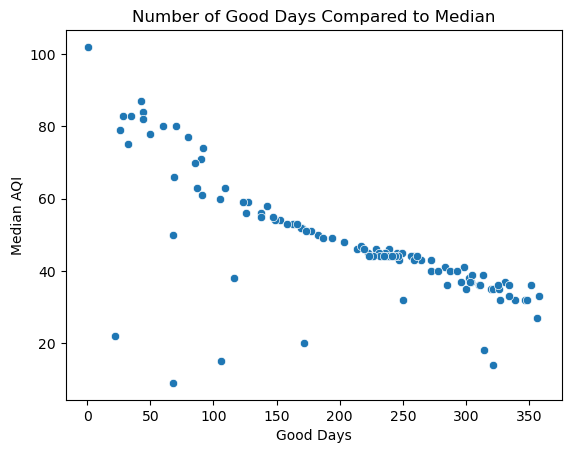

In [160]:
MedianGoodDays = sns.scatterplot(data=ca_aqi, x='Good Days', y='Median AQI')
plt.title('Number of Good Days Compared to Median')
plt.show()

In [161]:
stats.pearsonr(ca_aqi['Good Days'], ca_aqi['Median AQI'])

PearsonRResult(statistic=-0.7413430258037454, pvalue=4.531676569870009e-20)

We can see there is a strong negative correlation between the number of Good Days a county has and its median AQI; this means that the median likely gives an accurate reflection of general air quality based on how many days there are no issues with AQI.

From there, we needed find a way to compare county prevelance from our asthma dataset with median AQI so we could test our hypothesis.

To start, we combined our datasets based on county name

In [162]:
asthmaAQI = pd.merge(ca_aqi, ca_asthma2015, on=['County', 'County'])
asthmaAQI

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
0,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Total population,All ages,14.30%,(10.7 17.9),14.80%,(14.0 15.7)
1,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Child vs. adult,0 17 years,18.40%,(6.2 30.6),14.50%,(12.2 16.8)
2,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Child vs. adult,18+ years,13.10%,(9.2 17.0),14.90%,(14.0 15.9)
3,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Age group,0 4 years,Not available,Not available,4.90%,(2.9 7.0)
4,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Lifetime asthma prevalence,Age group,5 17 years,24.10%,(5.9 42.2),18.20%,(15.2 21.2)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.80%,(0.5 15.1),8.30%,(7.7 8.9)
1508,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,0 4 years,Not available,Not available,4.50%,(2.3 6.6)
1509,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,5 17 years,Not available,Not available,12.30%,(9.7 14.9)
1510,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,18 64 years,Not available,Not available,8.10%,(7.4 8.9)


Then, we got turning missing data into NaN values. We made sure we were looking only at current asthma prevalence, not lifetime prevalence, because we wanted to compare the asthma data with AQI data from the same year. We also got rid of percent signs so that we could later make charts with the data. We excluded counties with less than 300 days of AQI data collection, and finally, we saved this new dataframe as a csv file.

In [163]:
asthmaAQI = asthmaAQI[asthmaAQI["Asthma measure"].str.contains("Current asthma prevalence")]

asthmaAQI = asthmaAQI.replace('Not available', np.NaN)

asthmaAQI['County prevalence'] = np.char.rstrip(asthmaAQI['County prevalence'].values.astype('U'), '%').astype(float)

asthmaAQI = asthmaAQI[(asthmaAQI['Days with AQI'] >= 300) & (asthmaAQI['Days with AQI'] <= 370)]

asthmaAQI.to_csv('asthmaAQI.csv', index=False)

asthmaAQI.head()

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
7,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Total population,All ages,9.1,(5.9 12.2),8.70%,(8.1 9.3)
8,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.1,(3.9 26.4),10.10%,(8.2 12.0)
9,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.3,(4.0 10.7),8.30%,(7.7 8.9)
10,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,0 4 years,NaN,NaN,4.50%,(2.3 6.6)
11,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,5 17 years,19.4,(2.9 35.9),12.30%,(9.7 14.9)


We also needed to separate our data into the years 2015 and 2016

In [164]:
asthma2015 = asthmaAQI.loc[asthmaAQI['Year_x'] == 2015]
asthma2016 = asthmaAQI.loc[asthmaAQI['Year_x'] == 2016]

asthma2015.head()

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
7,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Total population,All ages,9.1,(5.9 12.2),8.70%,(8.1 9.3)
8,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.1,(3.9 26.4),10.10%,(8.2 12.0)
9,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.3,(4.0 10.7),8.30%,(7.7 8.9)
10,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,0 4 years,NaN,NaN,4.50%,(2.3 6.6)
11,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,5 17 years,19.4,(2.9 35.9),12.30%,(9.7 14.9)


Next, we needed to separate age groups in our asthma dataset into their own dataframes.
The age groups CA divided people into were:

All ages

0 17 years 

18+ years

0 4 years

5 17 years

18 64 years

65+ years

In [165]:
#separate groups for both asthmaAQI2015 and asthmaAQI2016
#SOMETHING IS WRONG: no rows for separated years

#ages 0-17
aa17 = asthmaAQI.loc[asthmaAQI['Group']=='0 17 years',:].reset_index(drop=True)

#ages 0-17 by year
aa17_2015 = asthma2015.loc[asthma2015['Group']=='0 17 years',:].reset_index(drop=True) 
aa17_2016 = asthma2016.loc[asthma2016['Group']=='0 17 years',:].reset_index(drop=True)

#ages 18 and up
aa18 = asthmaAQI.loc[asthmaAQI['Group']=='18+ years',:].reset_index(drop=True) 

aa18_2015 = asthma2015.loc[asthma2015['Group']=='18+ years',:].reset_index(drop=True) 
aa18_2016 = asthma2016.loc[asthma2016['Group']=='18+ years',:].reset_index(drop=True)

#ages 0-4
aa04 = asthmaAQI.loc[asthmaAQI['Group']=='0 4 years',:].reset_index(drop=True) 

aa04_2015 = asthma2015.loc[asthma2015['Group']=='0 4 years',:].reset_index(drop=True) 
aa04_2016 = asthma2016.loc[asthma2016['Group']=='0 4 years',:].reset_index(drop=True)

#ages 5-17
aa517 = asthmaAQI.loc[asthmaAQI['Group']=='5 17 years',:].reset_index(drop=True) 

aa517_2015 = asthma2015.loc[asthma2015['Group']=='5 17 years',:].reset_index(drop=True) 
aa517_2016 = asthma2016.loc[asthma2016['Group']=='5 17 years',:].reset_index(drop=True)

#ages 18-64
aa1864 = asthmaAQI.loc[asthmaAQI['Group']=='18 64 years',:].reset_index(drop=True)

aa1864_2015 = asthma2015.loc[asthma2015['Group']=='18 64 years',:].reset_index(drop=True) 
aa1864_2016 = asthma2016.loc[asthma2016['Group']=='18 64 years',:].reset_index(drop=True)

#ages 65 and up
aa65up = asthmaAQI.loc[asthmaAQI['Group']=='65+ years',:].reset_index(drop=True)

aa65_2015 = asthma2015.loc[asthma2015['Group']=='65+ years',:].reset_index(drop=True) 
aa65_2016 = asthma2016.loc[asthma2016['Group']=='65+ years',:].reset_index(drop=True)

#making an all ages category too because I think it will make the code clearer later
allages = asthmaAQI
allages2015 = asthmaAQI2015
allages2016 = asthma2016

From there, we were finally ready to start making comparisons between our asthma data and our AQI data

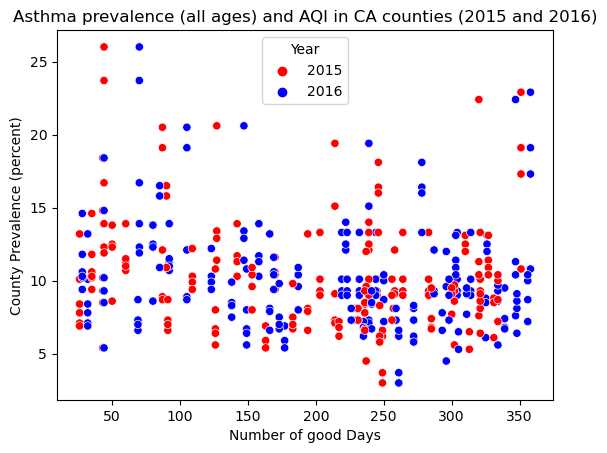

,State,County,Year_x,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,Days PM2.5,Days PM10,Year_y,Asthma measure,Comparison,Group,County prevalence,County 95% confidence interval,California prevalence,California 95% confidence interval
7,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Total population,All ages,9.1,(5.9 12.2),8.70%,(8.1 9.3)
8,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,0 17 years,15.1,(3.9 26.4),10.10%,(8.2 12.0)
9,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.3,(4.0 10.7),8.30%,(7.7 8.9)
10,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,0 4 years,NaN,NaN,4.50%,(2.3 6.6)
11,California,Alameda,2015,365,214,139,12,0,0,0,...,170,0,2015 2016,Current asthma prevalence,Age group,5 17 years,19.4,(2.9 35.9),12.30%,(9.7 14.9)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Child vs. adult,18+ years,7.8,(0.5 15.1),8.30%,(7.7 8.9)
1508,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,0 4 years,NaN,NaN,4.50%,(2.3 6.6)
1509,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,5 17 years,NaN,NaN,12.30%,(9.7 14.9)
1510,California,Yolo,2016,366,293,69,4,0,0,0,...,83,1,2015 2016,Current asthma prevalence,Age group,18 64 years,NaN,NaN,8.10%,(7.4 8.9)


In [173]:
colors = ['red', 'blue']

sns.scatterplot(x='Good Days', y='County prevalence', data=allages, hue='Year_x', palette=colors)
plt.xlabel("Number of good Days")
plt.ylabel("County Prevalence (percent)")
plt.legend(title="Year")
plt.title("Asthma prevalence (all ages) and AQI in CA counties (2015 and 2016)")
plt.show()

allages

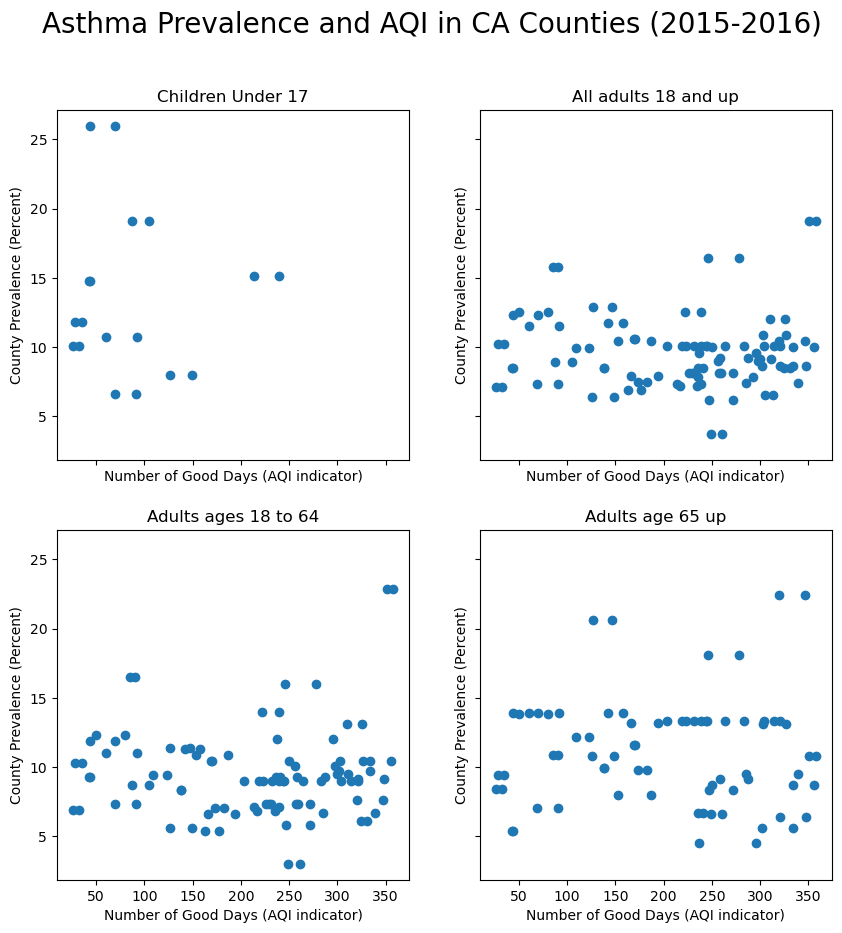

In [204]:
nrow = 2
ncol = 2

figure, ax = plt.subplots(nrow,ncol, sharex=True, sharey=True, figsize=(10,10)) 

agegroups = [['0 17 years', '18+ years'], ['18 64 years', '65+ years']]

colors = {'2016': 'blue', '2015': 'red'}

for i in range(nrow): 
    
    for j in range(ncol): 
        
        charts = agegroups[i][j]
        groupygroups = allages['Year_x']
        allages_charts = allages.loc[allages['Group']==charts, :]
        
        ax[i,j].scatter(allages_charts['Good Days'], allages_charts['County prevalence']) 
        ax[i,j].set_xlabel('Number of Good Days (AQI indicator)')
        ax[i,j].set_ylabel('County Prevalence (Percent)')
        figure.suptitle("Asthma Prevalence and AQI in CA Counties (2015-2016)", fontsize=20)
        if charts == '0 17 years':
            ax[i, j].set_title('Children Under 17')
        elif charts == '18+ years':
            ax[i, j].set_title('All adults 18 and up')
        elif charts == '18 64 years':
            ax[i, j].set_title('Adults ages 18 to 64')
        elif charts == '65+ years':
            ax[i, j].set_title('Adults age 65 up')

plt.show()